# Coding a simple perceptron with Backprop

In [2]:
import github_command as gt

In [6]:
gt.push(file_to_transfer="READMe.md",
        message="READMe update", repos="TDs_ESILV.git")

In [495]:
gt.push(file_to_transfer="BONUS_A_Simple_NN_for_a_Simple_LR.ipynb",
        message="Added dynamic legend", repos="TDs_ESILV.git")

In [221]:
import os, numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<img src="td4_ressources/img_perceptron_towards_data_science.png" width=500>

In [231]:
%matplotlib inline

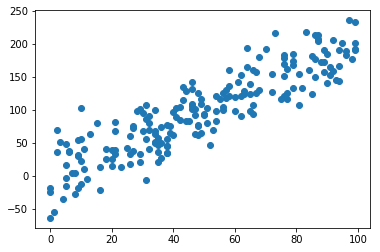

In [243]:
random_values = np.random.randint( 0,100, (200, 1))
X, y = random_values, 2*random_values + np.random.normal(0, 30, size=(200,1))  # y = 2*x + epsilon with epsilon ~ N(0,1)
plt.scatter(x=X,y=y)
plt.show()

In [244]:
X.reshape((200,))

array([77, 29, 79, 30, 15, 21, 79, 45, 64, 66, 34, 62, 61, 46,  7, 21, 73,
       38, 10, 58, 27,  0, 52, 76, 87, 76, 88, 36,  8, 34, 10, 96, 86, 76,
       81, 46, 79, 46, 70, 87, 31, 54, 32,  5, 48, 42, 82, 48, 60, 44, 49,
       77, 68,  1, 77, 46, 51, 47, 38,  9, 91, 97,  3, 38, 23, 89, 63, 11,
       64, 50, 32, 27, 31, 58, 72, 66, 38, 34, 83,  8, 44, 99, 18, 43, 60,
       30,  6, 38,  2, 98, 67,  4, 35, 67,  0, 56, 29, 89, 62, 34, 99, 76,
        9, 26, 99, 54, 39, 26, 10, 65,  5, 25, 96, 12, 34, 35, 94, 92, 86,
       57, 99, 43, 16, 48, 50, 32, 62, 57, 20, 92, 40,  2, 81, 27, 93, 20,
       29, 20, 36,  5, 65, 90, 40, 21, 65, 86, 26, 48, 90,  9,  6, 21, 84,
       95, 28, 79, 36, 87, 47,  0, 31, 11, 55, 49, 66, 53, 38, 46, 41, 75,
        5, 13, 35, 16, 49, 31, 72, 91, 51, 94, 54, 94, 58, 85, 32, 10, 41,
       35, 39, 56,  9, 18, 85, 42, 76, 63, 56, 89, 68, 47])

In [245]:
pd.DataFrame({"X":  X.reshape((200,)), 'y': y.reshape((200,))})

,X,y
0,77,126.184222
1,29,101.185848
2,79,173.969957
3,30,67.290256
4,15,79.326925
...,...,...
195,63,128.080082
196,56,100.112911
197,89,172.303824
198,68,130.347626


In [246]:
np.random.random_integers(-2,2, (1,))

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(-2, 2 + 1) instead
  """Entry point for launching an IPython kernel.


array([0])

In [247]:
weight = np.random.randint(-2,2, (X.shape[1],))

In [248]:
b= np.random.randint(0,10)

In [249]:
w =np.random.randint(-2,2,(1,1))

In [250]:
y

array([[126.1842221 ],
       [101.18584759],
       [173.96995683],
       [ 67.29025552],
       [ 79.32692545],
       [ 68.04171103],
       [185.1203543 ],
       [ 82.35906354],
       [164.78014474],
       [106.93757608],
       [ 99.10772819],
       [152.5904071 ],
       [142.63629367],
       [105.42692026],
       [  4.9684817 ],
       [ 81.23768082],
       [216.93181301],
       [ 44.98388961],
       [ 22.30414669],
       [136.58405938],
       [ 73.12111458],
       [-24.85097488],
       [ 46.85994334],
       [182.93718442],
       [213.33591619],
       [179.00934157],
       [172.66001541],
       [ 74.42723665],
       [-27.74293294],
       [ 62.76225397],
       [103.29620764],
       [189.00058826],
       [213.50203581],
       [151.21672057],
       [153.55271667],
       [132.30042193],
       [168.45176959],
       [101.13408817],
       [192.03337027],
       [206.56308302],
       [ 55.54742684],
       [120.90982428],
       [ 39.92098742],
       [ 16

np.dot(X, weight) + b


<img src="td4_ressources/img_formula_gradient_descent_backprop_mattmazur.png" width=600>

In [318]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Neural_Network_1neuron:
    
    def __init__(self, X, y, nb_epochs=100, fixed_bias=False):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.20)
        self.X_train, self.X_test = self.scale_values(self.X_train, self.X_test)
        self.y_train, self.y_test = \
            np.reshape(self.y_train, (len(self.y_train),1)),\
            np.reshape(self.y_test, (len(self.y_test),1))
        
        self.weights = [] * X.shape[1]  # as many weights as features, here 1
        self.weights = self.init_weights(X)
        self.bias, self.fixed_bias    = 0, fixed_bias
        self.training_predictions, self.mse = 0, 0
        self.learning_rate = 0.01
        self.nb_epochs = nb_epochs
        self.weights_update, self.bias_update = 0, 0
        self.records = pd.DataFrame([[self.weights, self.bias,0]], columns=['weights', 'bias', 'mse'])
    
    def scale_values(self, X_train, X_test):
        scale   = StandardScaler()
        X_train = scale.fit_transform(X_train)
        X_test  = scale.transform(X_test)
        return X_train, X_test
        
    def init_weights(self, X):
        nb_of_features_input = X.shape[1]
        return np.random.randint(-2,2, (nb_of_features_input, 1))
    
    def activation(self):
        return x
    def derivate_activation(self):
        return 1
    
    def forward_pass(self):
        self.training_predictions = np.dot(self.X_train, self.weights) + self.bias
    
    def compute_mse(self):
        self.mse = 1/(2*len(self.X_train)) * sum( ( self.training_predictions - self.y_train)**2 )
    
    def backpropagation(self):
        # derivative of error by weights so to update them along with bias
        # dE/dw = dE/da * da/dz * dz/dw
        # w = w - n*dE/dw
        # E = mse = (1/2n)* sum(( predictions(==activations) - target)**2) ON ALL TRAINING EXAMPLES
        
        self.dE_da = self.training_predictions - self.y_train #for all training examples
        
        self.da_dz = self.derivate_activation() # derivate of activation
        
        self.dz_dw = self.X_train     # z = W*X + bias => dz_dw = X    
        
        self.weights_update, self.bias_update = \
            ( 1 / self.X_train.shape[0] ) * np.reshape( sum( self.dE_da * self.da_dz * self.dz_dw), (self.X_train.shape[1], 1) ),\
            ( 1 / self.X_train.shape[0] ) * sum( self.dE_da * self.da_dz ),  # weights updates, bias update
    
    def update(self):
        self.weights = self.weights - self.learning_rate * self.weights_update
        self.bias    = self.bias    - self.learning_rate * self.bias_update if not self.fixed_bias else self.bias
        
    def predict(self):
        return np.dot(self.X_test, self.weights) + self.bias
    
    def run(self):
        for i in range(1, self.nb_epochs):
            self.forward_pass()
            self.compute_mse()
            self.backpropagation()
            self.update()
            self.records.loc[i] = [self.weights, self.bias, self.mse]  
        return self.records

In [272]:
unReseauDeNeurone = Neural_Network_1neuron(X, y, nb_epochs=2000)

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [273]:
records= unReseauDeNeurone.run()

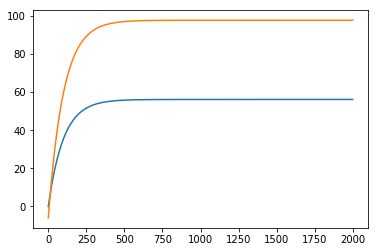

In [274]:
plt.plot(records['weights'])
plt.plot(records['bias'])

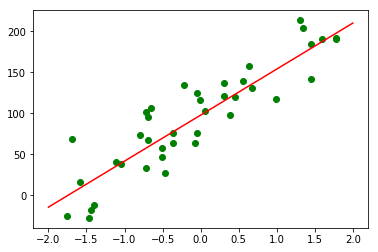

In [275]:
from sklearn.preprocessing import StandardScaler
plt.scatter(x=unReseauDeNeurone.X_test, y= unReseauDeNeurone.y_test, color='green')
x_ = np.linspace(-2, 2, 100).reshape((100,1))
y_ = float(unReseauDeNeurone.weights)*x_ + float(unReseauDeNeurone.bias)
plt.plot(x_, y_, color='red')

<IPython.core.display.Javascript object>


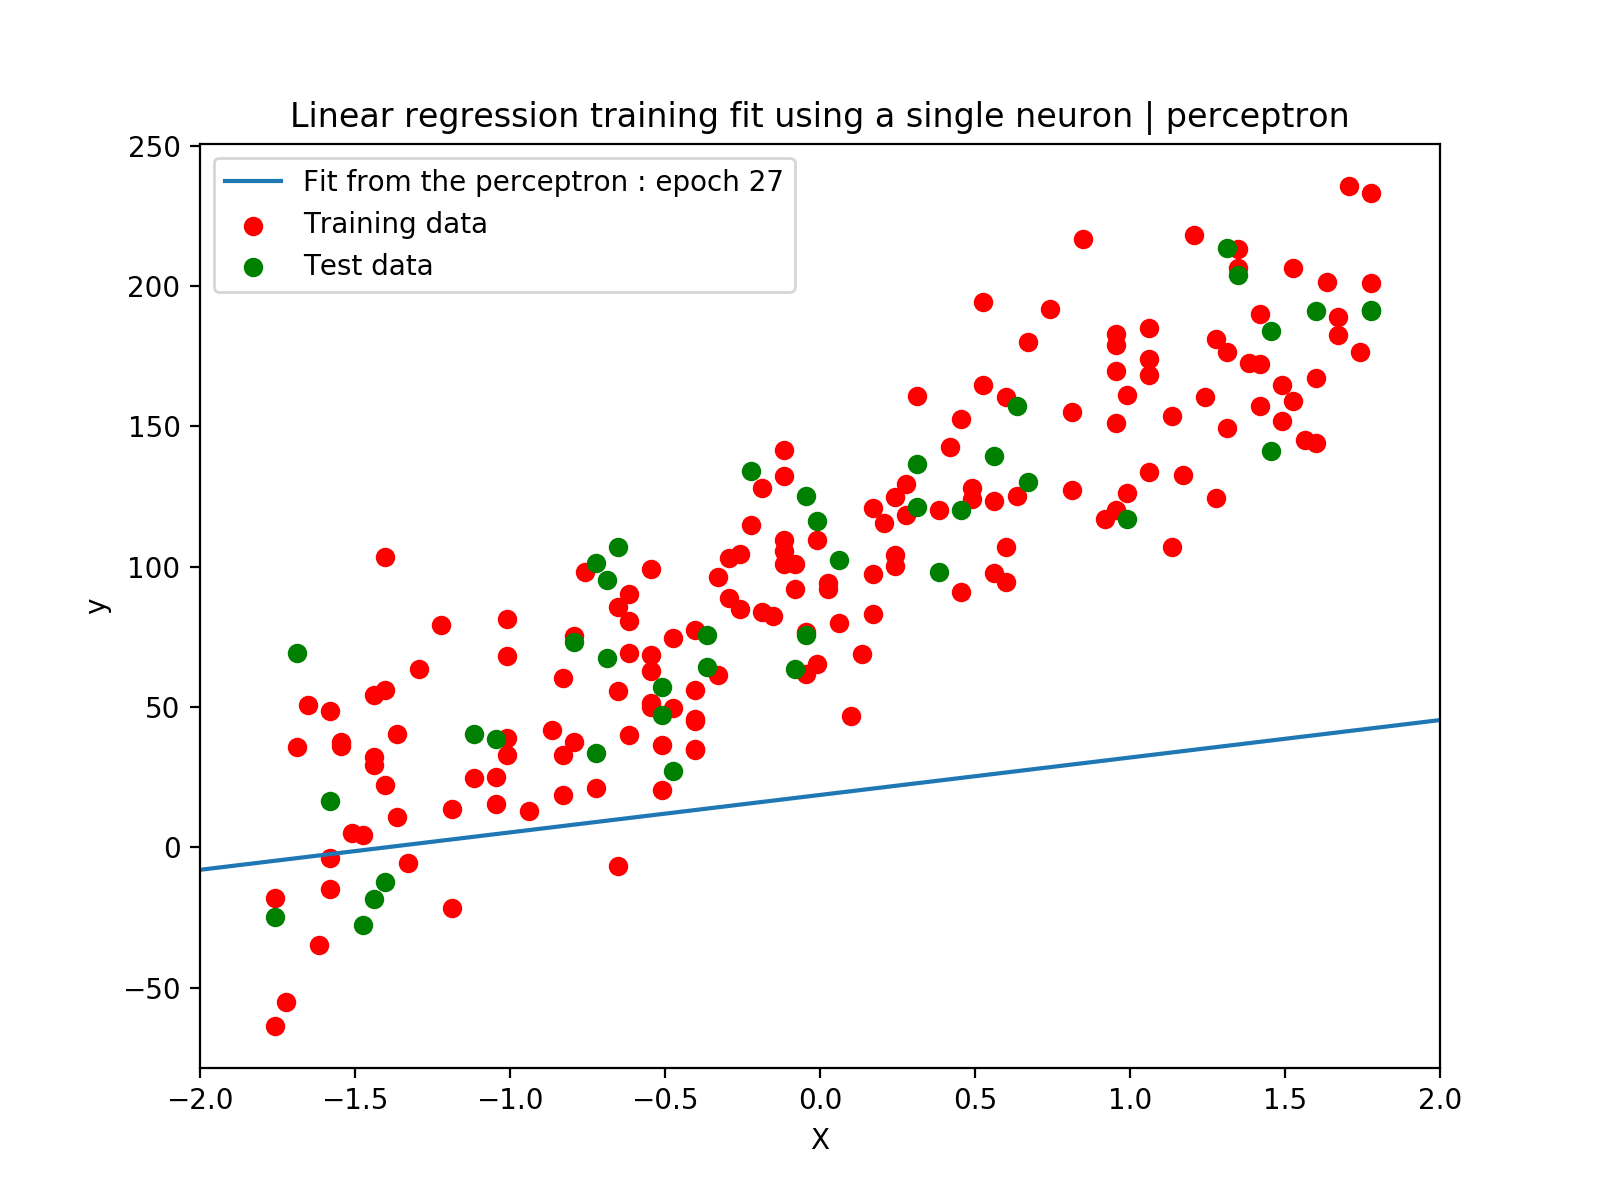

In [276]:
%matplotlib notebook

import matplotlib.animation as animation

fig, ax = plt.subplots()
# Initial plot
x_ = np.linspace(-2, 2, 100).reshape((100,1))
y_ = float(records.loc[0, "weights"])*x_ + float(records.loc[0, "bias"])

line, = ax.plot(x_, y_, label="Fit from the perceptron")

plt.rcParams["figure.figsize"] = (8,6)
plt.ylabel("y")
plt.xlabel("X")
plt.scatter(x=unReseauDeNeurone.X_train, y= unReseauDeNeurone.y_train, color='red', label="Training data")
plt.scatter(x=unReseauDeNeurone.X_test, y= unReseauDeNeurone.y_test, color='green', label="Test data")
plt.xlim(-2, 2)
plt.legend()
plt.title("Linear regression training fit using a single neuron | perceptron")

def animate(i):
    line.set_label("Fit from the perceptron : epoch {}".format(i))
    plt.legend()
    x_ = np.linspace(-2, 2, 100).reshape((100,1))
    line.set_xdata(x_)  # update the data
    line.set_ydata( float(records.loc[i, "weights"])*x_ + float(records.loc[i, "bias"]))# update the data
    return line,


ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, len(records)), interval=100)
plt.show()

## Time to try with multiple features ;-)

In [277]:
from sklearn.datasets import load_boston

In [278]:
X, y=load_boston(True)

In [279]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [280]:
pd.DataFrame(y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [333]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [335]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [336]:
lm = LinearRegression()

In [337]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [338]:
lm.coef_

array([-1.08024279,  0.98636299,  0.2286263 ,  0.68713323, -2.0888678 ,
        2.4231822 ,  0.39687137, -3.03576678,  3.09361581, -2.15055168,
       -2.27318428,  0.8872966 , -4.21677703])

In [385]:
unReseauDeNeurone = Neural_Network_1neuron(X, y, nb_epochs=5000, fixed_bias=True)

In [386]:
unReseauDeNeurone.forward_pass()

In [387]:
unReseauDeNeurone.compute_mse()

In [388]:
unReseauDeNeurone.backpropagation()

In [389]:
(1/unReseauDeNeurone.X_train.shape[0])* unReseauDeNeurone.dz_dw*unReseauDeNeurone.dE_da

array([[ 0.02160379,  0.02538769,  0.02140794, ..., -0.05883424,
        -0.01808008, -0.00926207],
       [ 0.04021354,  0.05291907,  0.08220323, ...,  0.05111896,
        -0.03086275,  0.12325195],
       [ 0.01394811,  0.01695351,  0.02271319, ...,  0.00842461,
        -0.01561225, -0.08690572],
       ...,
       [ 0.03728025, -0.26406199,  0.12663027, ...,  0.23383732,
        -0.03937453,  0.10628107],
       [ 0.03113575, -0.2282065 ,  0.10012953, ...,  0.12475962,
        -0.03030649,  0.05461615],
       [ 0.02108381,  0.02431935,  0.05102233, ..., -0.00844812,
        -0.0045987 ,  0.00096166]])

In [390]:
unReseauDeNeurone.weights_update

array([[ 1.88703143],
       [-4.79530813],
       [ 4.6197157 ],
       [ 0.34986913],
       [ 4.63410519],
       [-4.95372303],
       [ 4.24396517],
       [-3.61657277],
       [ 1.77405946],
       [ 2.53312856],
       [ 2.30814554],
       [-1.59511216],
       [ 5.82912376]])

In [391]:
unReseauDeNeurone.update()

In [392]:
unReseauDeNeurone.weights, unReseauDeNeurone.bias

(array([[-1.01887031],
        [-1.95204692],
        [ 0.95380284],
        [ 0.99650131],
        [ 0.95365895],
        [ 1.04953723],
        [-0.04243965],
        [-0.96383427],
        [-0.01774059],
        [-2.02533129],
        [-2.02308146],
        [ 1.01595112],
        [-0.05829124]]), 0)

In [393]:
unReseauDeNeurone.run()

,weights,bias,mse
0,"[[-1], [-2], [1], [1], [1], [1], [0], [-1], [0...",0,0
1,"[[-1.0360193616485591], [-1.9062341992385703],...",0,[289.19782085537395]
2,"[[-1.0515605897407203], [-1.862439937155419], ...",0,[287.6606865272229]
3,"[[-1.0656004010008688], [-1.820549563122688], ...",0,[286.28304594908207]
4,"[[-1.0782385845965397], [-1.7804553960497962],...",0,[285.04649685826416]
...,...,...,...
4995,"[[-1.0178405835323077], [0.980762554850732], [...",0,[265.7160829638114]
4996,"[[-1.0178430856676386], [0.9807671408341194], ...",0,[265.7160826402138]
4997,"[[-1.0178455861820683], [0.9807717238819209], ...",0,[265.71608231701]
4998,"[[-1.0178480850767637], [0.9807763039962215], ...",0,[265.7160819941978]


In [359]:
lm.coef_

array([-1.08024279,  0.98636299,  0.2286263 ,  0.68713323, -2.0888678 ,
        2.4231822 ,  0.39687137, -3.03576678,  3.09361581, -2.15055168,
       -2.27318428,  0.8872966 , -4.21677703])

In [383]:
at_499  = unReseauDeNeurone.records.loc[499, "weights"].reshape((13,))
at_1999 = unReseauDeNeurone.records.loc[1999, "weights"].reshape((13,))
at_4999 = unReseauDeNeurone.records.loc[1999, "weights"].reshape((13,))

<BarContainer object of 13 artists>

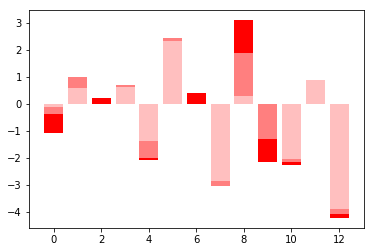

In [384]:
plt.bar(x=np.arange(len(lm.coef_)), height=lm.coef_, color='red')
plt.bar(x=np.arange(len(lm.coef_)), height=at_499, color='white', alpha = 0.5)
plt.bar(x=np.arange(len(lm.coef_)), height=at_1999, color='white', alpha = 0.5)

### Visualization • Multiple regression line

In [ ]:
unReseauDeNeurone.records.

In [208]:
unReseauDeNeurone.bias

array([21.74326975])

In [212]:
len(unReseauDeNeurone.predict())

102

In [213]:
len(unReseauDeNeurone.X_test)

102

In [215]:
X_test.shape

(102, 13)

In [216]:
unReseauDeNeurone.predict().shape

(102, 1)

In [220]:
unReseauDeNeurone.X_test[:,]

array([[-0.14902302, -0.51321633,  1.26779175, ..., -1.68842144,
        -2.02473907,  2.14297268],
       [-0.41813223, -0.51321633, -0.14151863, ..., -0.28394548,
        -0.13163564,  0.45456954],
       [ 0.02861588, -0.51321633,  1.04984198, ...,  0.80339075,
        -0.06845881,  0.23440402],
       ...,
       [-0.40022453, -0.51321633, -0.1577176 , ..., -0.01211142,
         0.37234812,  0.81496788],
       [-0.42359729,  0.51453919, -0.86016385, ...,  0.57686237,
         0.42605943, -0.4232879 ],
       [-0.42792035, -0.51321633, -1.25335703, ..., -0.28394548,
         0.40999006, -1.07957749]])

In [306]:
unReseauDeNeurone.records

,weights,bias,mse
0,"[[-1], [0], [-1], [0], [1], [1], [-1], [0], [1...",-7,0
1,"[[-1.0087950283174412], [0.016457485756419886]...",[-6.41732405940594],[439.3291634841173]
2,"[[-1.0125724459604828], [0.024063762080432885]...",[-6.130348838613861],[430.7431694221274]
3,"[[-1.015970146951504], [0.03128864535781298], ...",[-5.846243370029702],[422.3353046884791]
4,"[[-1.0190114980736744], [0.038155408805307156]...",[-5.564978956131386],[414.1012256555419]
...,...,...,...
495,"[[-0.6712114131316587], [0.5685912083906471], ...",[22.07992127227768],[10.875229966465305]
496,"[[-0.6712051964484973], [0.569132915813925], [...",[22.081924039752924],[10.873719476723695]
497,"[[-0.6711999929397607], [0.5696737072736573], ...",[22.083906779553416],[10.872221078122298]
498,"[[-0.6711957958002529], [0.5702135844576511], ...",[22.085869691955903],[10.870734592940968]


In [ ]:
unReseauDeNeurone.records.rename(

In [311]:
df = pd.concat([unReseauDeNeurone.records.weights.apply(lambda x: pd.Series(x[:,0])), 
                unReseauDeNeurone.records.bias.astype(int).to_frame()], axis=1)

In [314]:
%matplotlib inline

In [317]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,bias
0,-1.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,-2.000000,-7
1,-1.008795,0.016457,-1.010221,0.027052,0.985006,1.058390,-1.000650,-0.010900,0.993657,-2.010977,-0.041423,0.021094,-2.046232,-6
2,-1.012572,0.024064,-1.014534,0.040257,0.978216,1.086691,-1.000358,-0.016940,0.991216,-2.015679,-0.061370,0.031072,-2.068357,-6
3,-1.015970,0.031289,-1.018361,0.053251,0.971853,1.114424,-0.999692,-0.023333,0.989219,-2.019900,-0.080835,0.040697,-2.089863,-5
4,-1.019011,0.038155,-1.021733,0.066038,0.965888,1.141609,-0.998682,-0.030051,0.987637,-2.023671,-0.099840,0.049990,-2.110781,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.671211,0.568591,-0.376845,0.691416,-0.477167,2.751286,-0.239087,-1.984902,1.767877,-1.718686,-1.649933,0.822105,-3.729769,22
496,-0.671205,0.569133,-0.376081,0.691284,-0.479573,2.750724,-0.238585,-1.986500,1.768620,-1.718724,-1.650565,0.822273,-3.730236,22
497,-0.671200,0.569674,-0.375319,0.691152,-0.481974,2.750163,-0.238084,-1.988096,1.769361,-1.718763,-1.651196,0.822439,-3.730702,22
498,-0.671196,0.570214,-0.374557,0.691020,-0.484371,2.749602,-0.237583,-1.989688,1.770102,-1.718803,-1.651825,0.822604,-3.731166,22


In [111]:
np.reshape(sum((unReseauDeNeurone.training_predictions - unReseauDeNeurone.y_train)*unReseauDeNeurone.X_train), (unReseauDeNeurone.X_train.shape[1], 1))

array([[ 353.81384134],
       [-351.44305456],
       [ 748.03760729],
       [-359.05628061],
       [ 637.39485702],
       [ 134.49716035],
       [ 756.38008707],
       [-706.39169559],
       [ 610.37836338],
       [ 595.27381473],
       [-195.00034163],
       [-945.30626539],
       [ 510.76342285]])

In [92]:
unReseauDeNeurone.bias

-5

In [107]:
unReseauDeNeurone.weights

array([[ 0],
       [-1],
       [ 1],
       [-1],
       [-2],
       [ 1],
       [ 1],
       [-1],
       [ 0],
       [ 0],
       [-2],
       [-2],
       [ 1]])